In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import natsort

In [2]:
FILE = 'data/SAINT Analysis 2-3 repeats-Organized.xlsx'

In [ ]:
# Get data and filter out low-confidence interactions (SaintScore < 0.75)
df = pd.read_excel(FILE, sheet_name='SAINT Analysis 2-3 repeats', usecols=['Bait', 'Spec', 'SaintScore', 'Prey'])
df = df[df['SaintScore'] > 0.75]
df['Bait'] = df['Bait'].str.replace('R', 'RAB')
df['Spec'] = df['Spec'].str.split('|').apply(lambda x: np.array(x).astype(int))

baits = natsort.natsorted(df['Bait'].unique())

In [31]:
def calculate_spearmanr(counts):
    corr = list()
    for i, arr_i in enumerate(counts_rot):
        for j, arr_j in enumerate(counts_rot):
            if i >= j:
                continue
            # Calculate spearman correlation
            corr.append(stats.spearmanr(counts_rot[i], counts_rot[j]).correlation)
        
    
    return np.mean(corr)


def calculate_jaccard_index(first_preys, second_preys):
    
    return len(set.intersection(first_preys, second_preys)) / len(set.union(first_preys, second_preys))

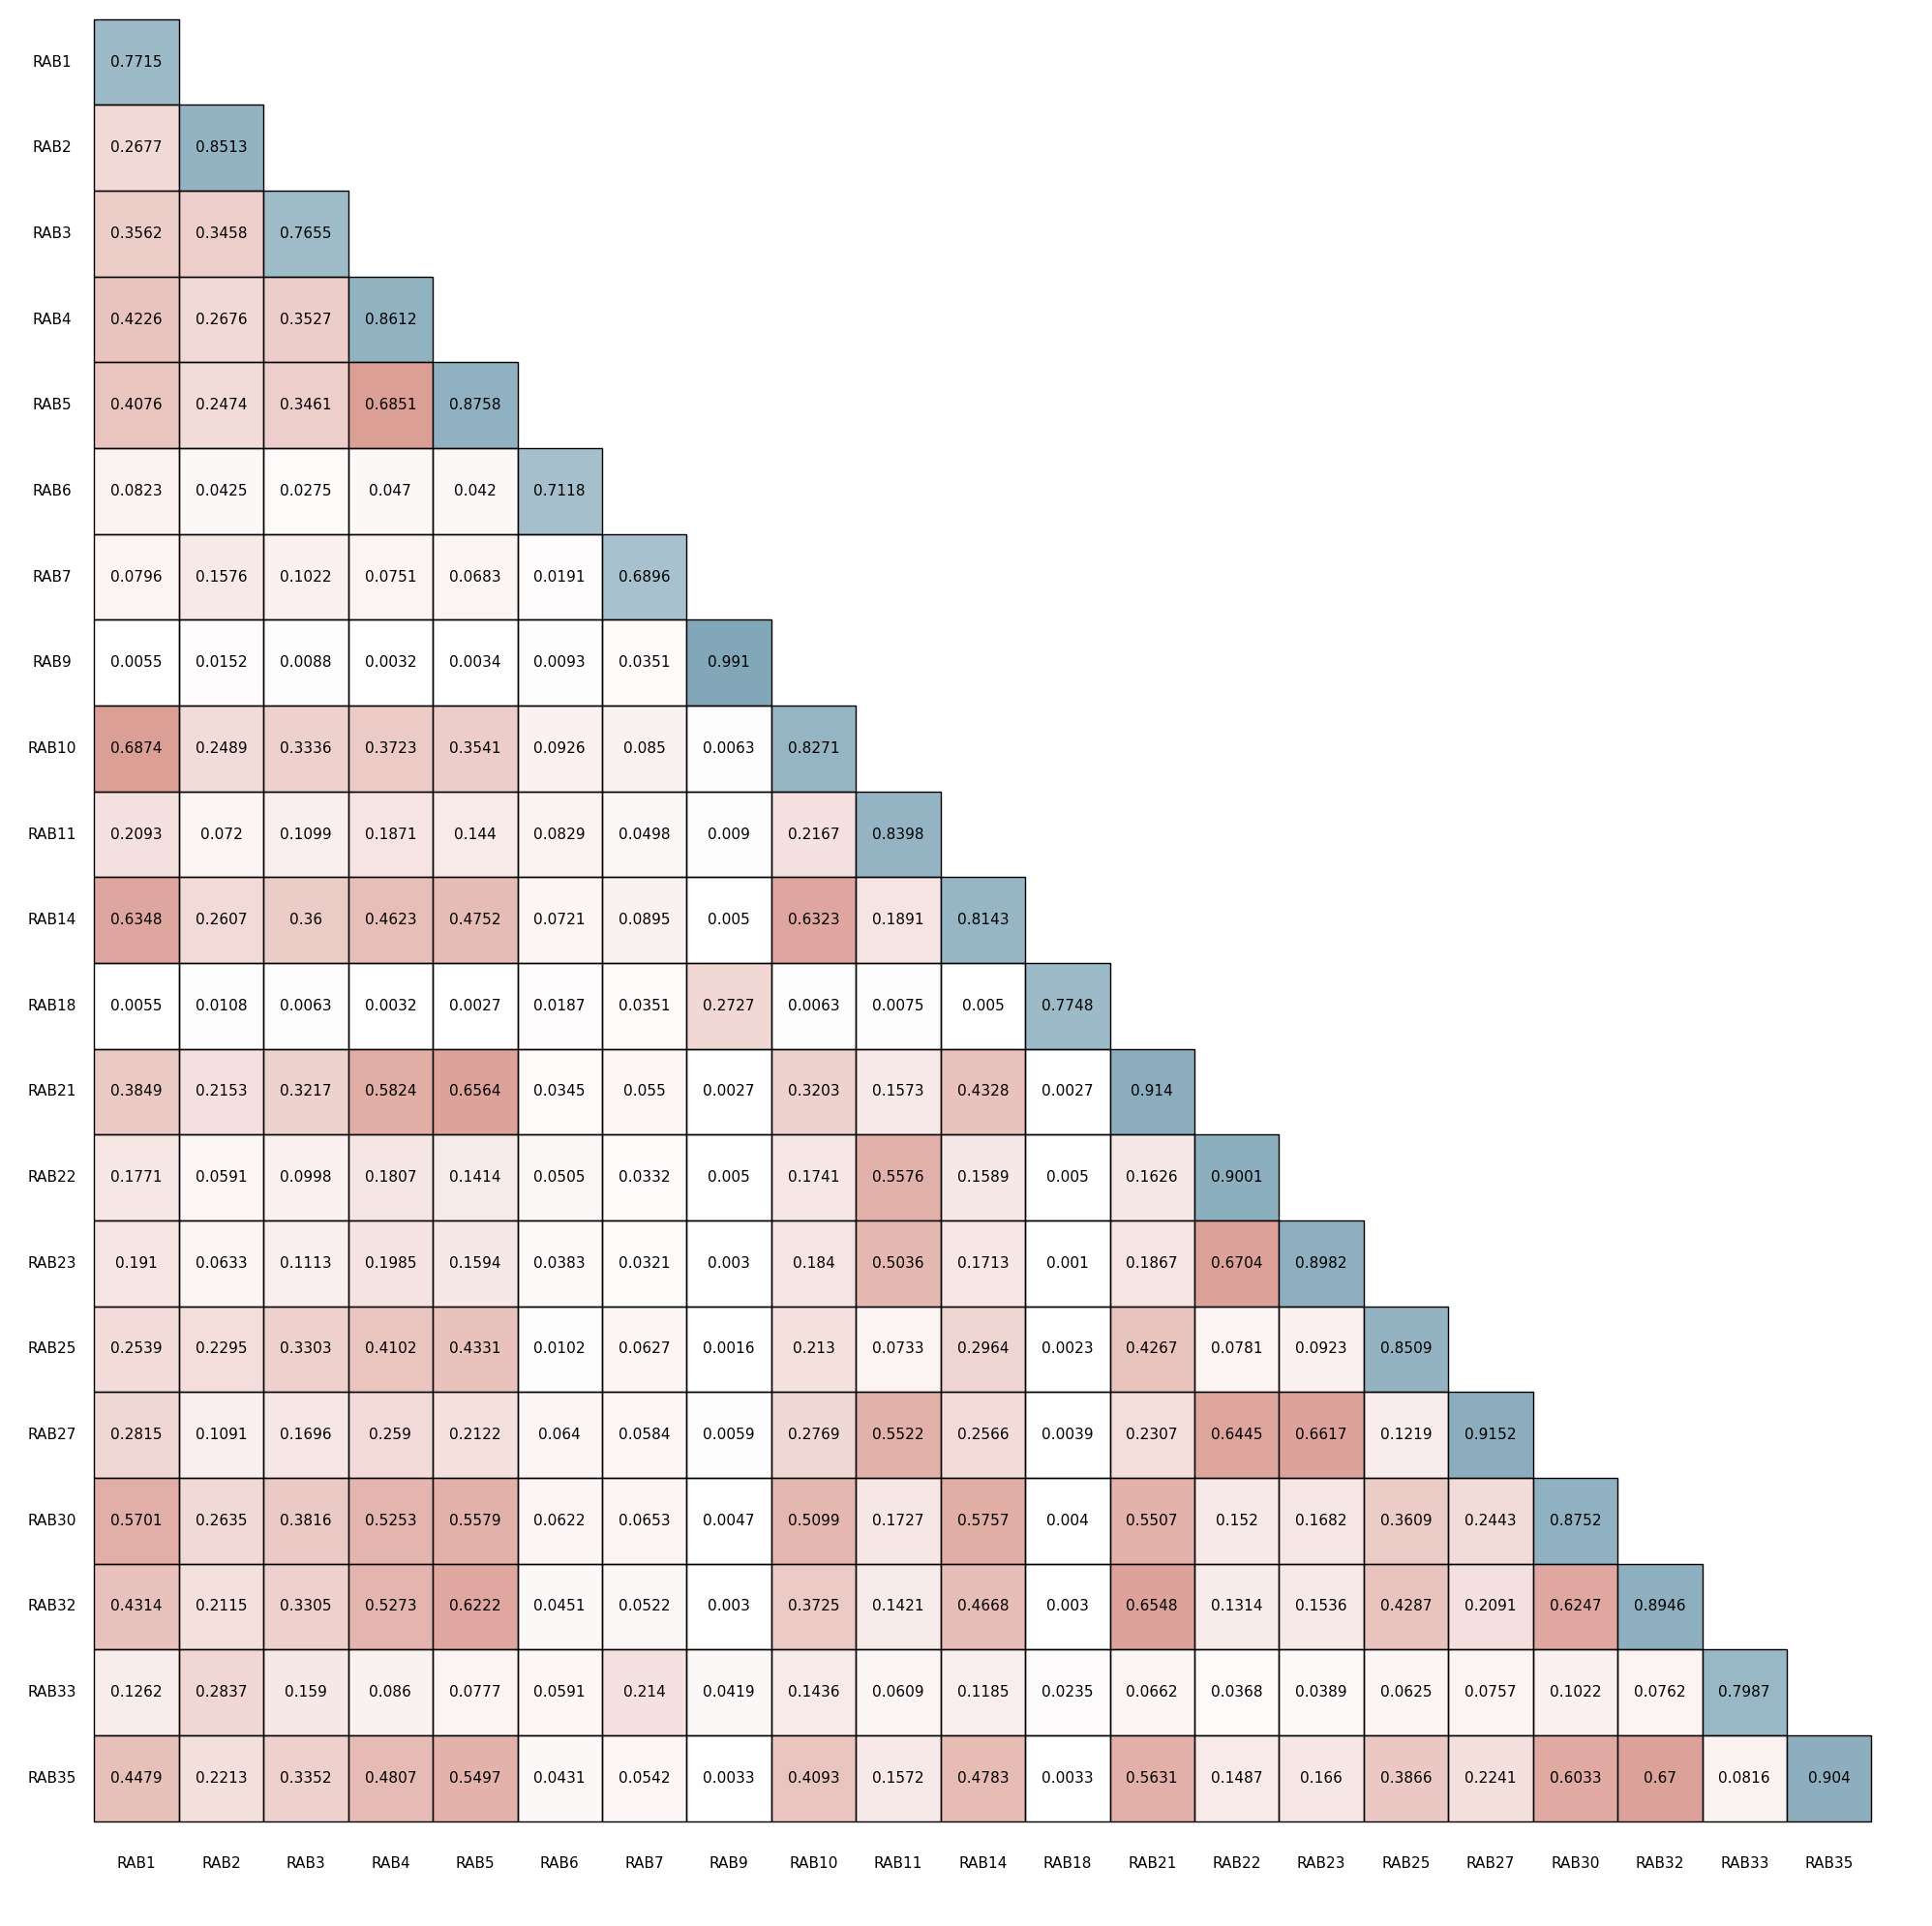

In [58]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')
table = mpl.table.Table(ax, loc='center')

for i, first_bait in enumerate(baits):
    for j, second_bait in enumerate(baits):
        if i < j:
            continue
        
        if i == j:
            
            counts = df[df['Bait'] == first_bait]['Spec']
            counts_rot = list(zip(*counts[::1]))
            
            value = calculate_spearmanr(counts_rot)
            color = (0.s, 0.65, 0.72, value)
            
        else:
            
            first_preys = set(df[df.Bait == first_bait]['Prey'])
            second_preys = set(df[df.Bait == second_bait]['Prey'])
                 
            value = calculate_jaccard_index(first_preys, second_preys)
            color = (0.8, 0.45, 0.4, value)

        table.add_cell(i, j, 0.03, 0.03, text=round(value, 4), loc='center', facecolor=color)
        
    table.add_cell(len(baits)+1, i, 0.03, 0.03, text=first_bait, loc='center', facecolor='white'),
    table.add_cell(i, -1, 0.03, 0.03, text=first_bait, loc='center', facecolor='white')
    
    table.get_celld()[len(baits)+1, i].visible_edges = 'open'
    table.get_celld()[i, -1].visible_edges = 'open'

table.set_fontsize(20)
table.scale(1.5, 1.5)
ax.add_table(table)
fig.tight_layout()
    

In [ ]:
fig.savefig('figures/similarity_matrix.png')